### Import Modules and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import datetime, nltk, warnings

#Scikit-learn - DS
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML


#Lib that support the market basket library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


#-----------------------
# import plotly.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
data = pd.read_excel('info-dataset.csv')

### Exploratory Data Analyst

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Weekdays,Weekends,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,False,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,False,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Day          541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  Year         541909 non-null  int64         
 11  Weekdays     541909 non-null  bool          
 12  Weekends     541909 non-null  bool          
 13  Price        541909 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 50.6+ M

In [5]:
#Check the number of null values in the dataset
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Day                 0
Month               0
Year                0
Weekdays            0
Weekends            0
Price               0
dtype: int64

* In reality, we can connect with the data engineer (DE) to investigate the cause of this issue, which includes the following steps:

1. Determine whether the customer is new or existing => so it means that they do not have their specific ID

2. Identify any problems with the systems that might be preventing customer recognition.

3. Check for fraudulent customers who may be originating from competitors and generating fake orders.

=> In this study case, we will remove these information first to get the cleaned one


Finding the duplicate rows and NaN rows and then remove/filter them

In [6]:
data = data.dropna()

In [7]:
#Double check if there is any null value
data.isnull().sum() #-> it looks cleared already

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Day            0
Month          0
Year           0
Weekdays       0
Weekends       0
Price          0
dtype: int64

In [8]:
#Find the duplicate rows within the dataset make dataset become worse
print('#Duplicate rows: {}'.format(data.duplicated().sum()))

#Duplicate rows: 5225


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
#double check again to find if there is any duplicate row in our dataset
print('#Duplicate rows: {}'.format(data.duplicated().sum()))

#Duplicate rows: 0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Day          401604 non-null  int64         
 9   Month        401604 non-null  int64         
 10  Year         401604 non-null  int64         
 11  Weekdays     401604 non-null  bool          
 12  Weekends     401604 non-null  bool          
 13  Price        401604 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 40.6+ MB


From the result we can see that, the total rows/data now is decreased from 541909 to 401604 (~25,9% decreased). 

It means, there are around ~25,9% from all rows that contain at least one missing values or duplicate rows.

In [12]:
#checking the describe to find if there is any outliers
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Day,Month,Year,Price
count,401604.000000,401604,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,15.038623,7.595407,2010.934378,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,1.000000,2010.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,7.000000,5.000000,2011.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,15.000000,8.000000,2011.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,22.000000,11.000000,2011.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,31.000000,12.000000,2011.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,8.652640,3.417451,0.247620,430.352218


From the describe table, we can see that there are some rows that have the quantity is < 0, this makes the data non-senes -> remove these lines from the dataset

The frequency of each items purchased => check all the products that has quantities is over >=0

In [13]:
data = data[data['Quantity']>=0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Weekdays,Weekends,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,False,True,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,False,True,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,False,True,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,False,True,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,False,True,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,False,True,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,False,True,16.60


We can check the data now become clear and ready to be analyzed.!!!!!

### Loading visualization

1. Top 10 countries that have many distinct InvoiceNo in the dataset

In [14]:
countries = data.groupby('Country').nunique().sort_values('InvoiceNo', ascending=False)
countries.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Day,Month,Year,Weekdays,Weekends,Price
Country,,,,,,,,,,,,,
United Kingdom,16649,3645,3844,294,15615,403,3921,31,12,2,2,2,2793
Germany,457,1665,1697,47,452,106,94,31,12,2,2,2,501
France,389,1522,1544,52,390,96,87,31,12,2,2,2,476
EIRE,260,1943,1988,61,259,112,3,31,12,2,2,2,559
Belgium,98,777,784,33,98,65,25,30,12,2,2,2,181


In [15]:
countries = countries['InvoiceNo']

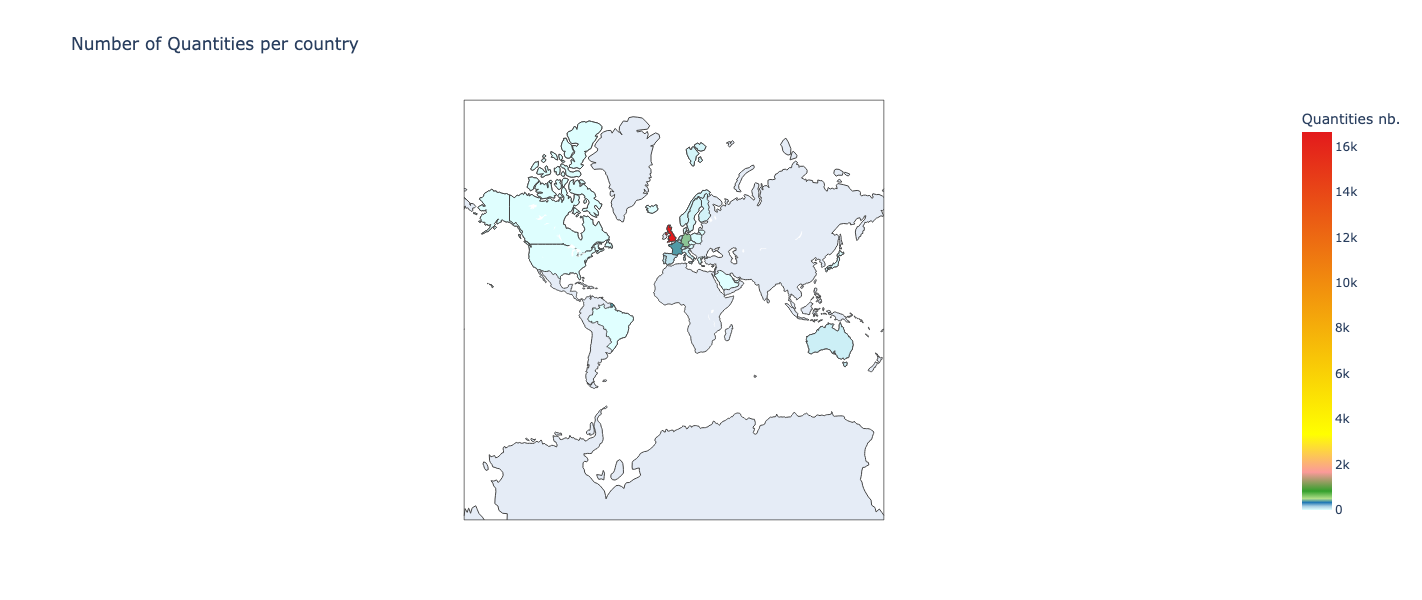

In [17]:
data1 = dict(type='choropleth',locations = countries.index,
             locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Quantities nb.'},
            colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
            reversescale = False)
#_______________________
layout = dict(title='Number of Quantities per country',geo = dict(showframe = True, projection={'type':'mercator'}),width=1000,height=600)
#______________
choromap = go.Figure(data = [data1], layout = layout)
iplot(choromap, validate=False)


# We see that the dataset is largely dominated by orders made from the UK.

2. Top 10 products that has sold in the dataset

In [18]:
top10_product = data.groupby(['Description'],as_index=False).agg({'Quantity':sum})
top10_product = top10_product.sort_values(by = 'Quantity',ascending = False)
top10_product.head(10)

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706
216,ASSORTED COLOUR BIRD ORNAMENT,35263
2269,PACK OF 72 RETROSPOT CAKE CASES,33670
2600,POPCORN HOLDER,30919
2656,RABBIT NIGHT LIGHT,27153
2047,MINI PAINT SET VINTAGE,26076


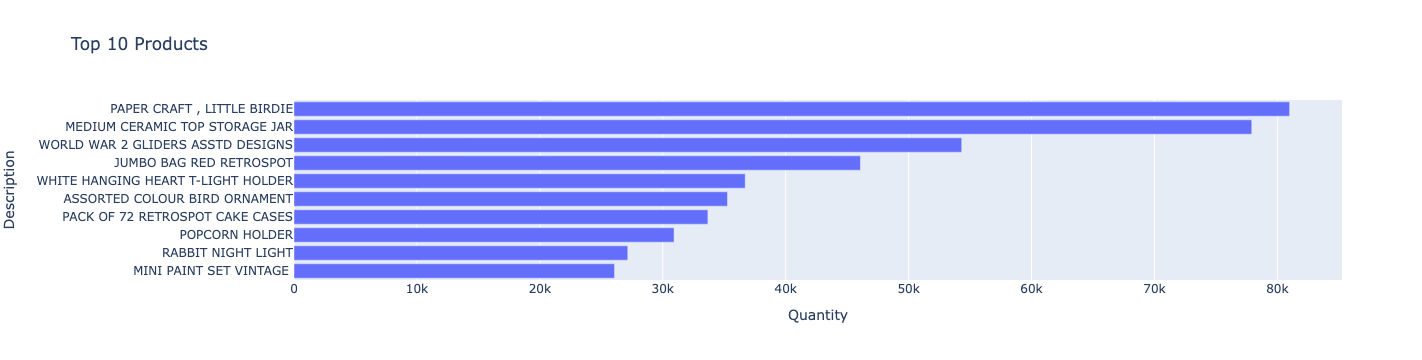

In [19]:
px.bar(top10_product.head(10).sort_values('Quantity', ascending=True), y='Description', x='Quantity', title='Top 10 Products',orientation='h')

In [20]:
#Starting time and Ending time
start_date= data.InvoiceDate.min()
last_date = data.InvoiceDate.max()
print('Dataset time is from',start_date,'to',last_date)

Dataset time is from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


### RFM Index (Recency, Frequency, and Monetary)
- Recency calculates the total number of days since each customer's last purchase.
- Frequency represents how many times each customer has made a purchase.
- Monetary indicates the total amount of money each customer has spent.

We will focus on the countries that account for more 80% the invoice "United Kingdom" to analyze depending on the RFM index

In [21]:
rfm = data[data['Country']=="United Kingdom"].groupby("CustomerID").agg({
    "InvoiceDate": lambda values: (last_date - values.max()).days,
    "InvoiceNo" : lambda values: len(values),
    "Price": lambda values: np.sum(values),
})
rfm

,InvoiceDate,InvoiceNo,Price
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,2,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [22]:
examrfm = rfm.sort_values(['InvoiceDate'],ascending = False)

In [23]:
examrfm.sort_values(['Price'],ascending = False).iloc[0:10]

,InvoiceDate,InvoiceNo,Price
CustomerID,,,
18102.0,0,431,259657.30
17450.0,7,336,194390.79
16446.0,0,3,168472.50
17511.0,2,963,91062.38
16029.0,38,241,80850.84
12346.0,325,1,77183.60
16684.0,3,277,66653.56
14096.0,3,5111,65164.79
13694.0,3,568,65039.62


In [24]:
#Change the name of the columns to rfm value
rfm.columns = ["recency", "frequency", "monetary"]
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,2,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [25]:
#Determined the range for dividing the customers depending on the RFM scores.
quantiles = np.arange(1, 6) * 20
quantiles

array([ 20,  40,  60,  80, 100])

In [26]:
rfm["r_score"] = np.digitize(rfm.recency, bins = np.percentile(rfm.recency, quantiles)
                           , right=True)

rfm["m_score"] = np.digitize(rfm.monetary, bins = np.percentile(rfm.monetary, quantiles)
                           , right=True)

rfm["f_score"] = np.digitize(rfm.frequency, bins = np.percentile(rfm.frequency, quantiles)
                           , right=True)

rfm["r_score"] = 4 - rfm["r_score"]

rfm["r_score"] = rfm["r_score"] + 1
rfm["f_score"] = rfm["f_score"] + 1
rfm["m_score"] = rfm["m_score"] + 1


rfm.head()

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
12346.0,325,1,77183.60,1,5,1
12747.0,1,103,4196.01,5,5,4
12748.0,0,4413,33053.19,5,5,5
12749.0,3,199,4090.88,5,5,5
12820.0,2,59,942.34,5,4,4


In [27]:
#Take ramdomly 10 different customers
rfm.sample(10, random_state=123)

,recency,frequency,monetary,r_score,m_score,f_score
CustomerID,,,,,,
13860.0,0,76,1245.90,5,4,4
15181.0,65,16,689.48,3,3,2
16126.0,28,117,6287.77,4,5,4
14518.0,63,16,174.37,3,1,2
14217.0,1,100,2004.98,5,5,4
16986.0,29,3,1873.20,4,4,1
18151.0,134,38,653.35,2,3,3
14834.0,17,67,1720.30,4,4,4
15411.0,25,98,1348.93,4,4,4


In [28]:
from sklearn import preprocessing, metrics, cluster

#StandardScaler parts
scaler = preprocessing.StandardScaler()
X = rfm[["r_score", "f_score", "m_score"]].values
X = scaler.fit_transform(X.astype("float32"))
X

array([[-1.4176806 , -1.3903866 ,  1.4143939 ],
       [ 1.4018607 ,  0.7204959 ,  1.4143939 ],
       [ 1.4018607 ,  1.4241233 ,  1.4143939 ],
       ...,
       [ 1.4018607 , -1.3903866 , -1.4136727 ],
       [ 1.4018607 ,  1.4241233 ,  1.4143939 ],
       [-0.00790996,  0.7204959 ,  0.7073773 ]], dtype=float32)

Clustering the customers using the algorithm K-Means Clustering

Text(0, 0.5, 'Inertia Score')

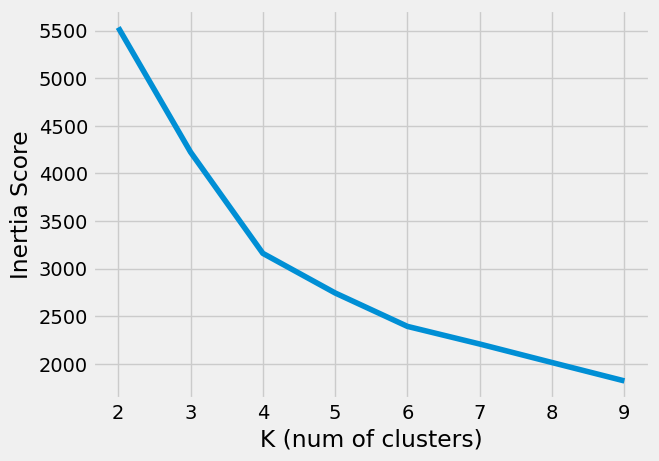

In [29]:
#finding which is the best value for choosing the # beforing
inertias = {}
for k in range(2, 10): 
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")

Following the elbow-method applying for the K-means clustering, we can see that the value K = 4 is the most suitable one.
- When K increases from 2 to 4, there is a significant drop in the value from 5533.041 to 3161.188.
- However, when K increases further from 4 to 9, the decrease in the plot becomes less significant.

In [31]:
k = 4
kmeans = cluster.KMeans(n_clusters=k, random_state = 1)
rfm["cluster"] = kmeans.fit_predict(X)

In [32]:
rfm["distance"] = 0.0
for i in range(k):
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    cluster_points = X[rfm.cluster == i]
    rfm["distance"][rfm.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
rfm.sample(20)

,recency,frequency,monetary,r_score,m_score,f_score,cluster,distance
CustomerID,,,,,,,,
14034.0,21,86,648.89,4,3,4,1,1.131875
14772.0,111,9,139.26,2,1,1,2,0.699780
17936.0,4,72,380.13,5,2,4,0,1.491260
18210.0,1,134,2621.38,5,5,5,1,0.673529
14794.0,2,80,1319.91,5,4,4,1,0.653085
14048.0,304,85,409.93,1,2,4,3,1.443353
14662.0,28,157,741.37,4,3,5,1,1.132432
16554.0,41,52,837.10,3,3,3,3,0.809544
12923.0,63,28,172.82,3,1,2,0,1.048046


In [33]:
rfm.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.957192,808
1,0.778461,1179
2,0.791411,1125
3,0.896735,809


Depending on this information, we can divided customers into many different kind of the membership tier such as "Diamond", "Gold", "Silver", and "Plate"

### Analyze the product sold and profit

In [34]:
quantity_line = data.groupby(['Year','Month'])['Quantity'].sum().tolist()
quantity_line

[311063,
 348522,
 265043,
 347623,
 291369,
 372948,
 363014,
 367372,
 398190,
 543654,
 591551,
 678760,
 286777]

In [35]:
#Time axis
quantity_month = data.groupby(['Year','Month'])['Quantity'].sum().index
quantity_month

MultiIndex([(2010, 12),
            (2011,  1),
            (2011,  2),
            (2011,  3),
            (2011,  4),
            (2011,  5),
            (2011,  6),
            (2011,  7),
            (2011,  8),
            (2011,  9),
            (2011, 10),
            (2011, 11),
            (2011, 12)],
           names=['Year', 'Month'])

In [36]:
quantity_month = [datetime.date(year, month, 1).strftime('%b-%Y') for year, month in quantity_month]
quantity_month

['Dec-2010',
 'Jan-2011',
 'Feb-2011',
 'Mar-2011',
 'Apr-2011',
 'May-2011',
 'Jun-2011',
 'Jul-2011',
 'Aug-2011',
 'Sep-2011',
 'Oct-2011',
 'Nov-2011',
 'Dec-2011']

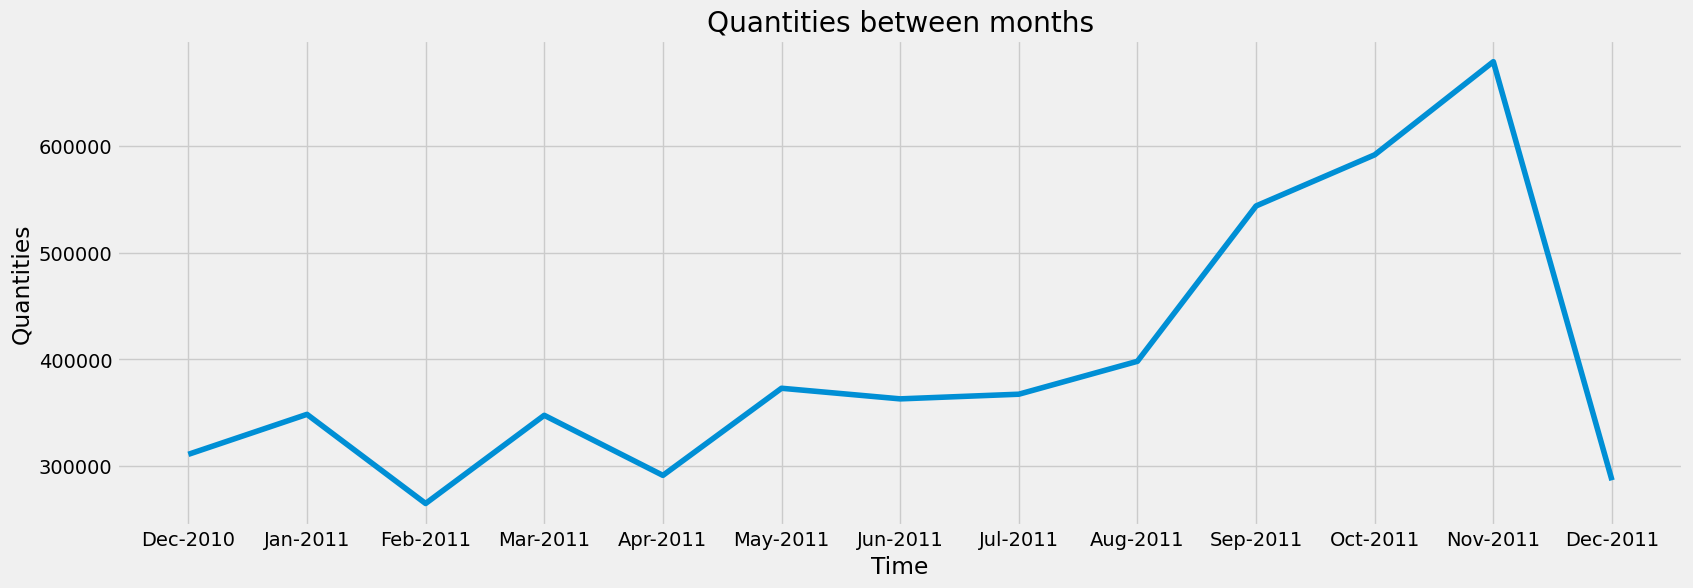

In [37]:
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
plt.plot(quantity_month,quantity_line)
plt.xlabel('Time')
plt.ylabel('Quantities')
plt.title('Quantities between months')
#plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()

In [38]:
#nunique value of the Invoice following the time
invoice_no = data.groupby(['Year','Month'])['InvoiceNo'].nunique()
invoice_no

Year  Month
2010  12       1400
2011  1         987
      2         998
      3        1321
      4        1149
      5        1555
      6        1393
      7        1331
      8        1281
      9        1756
      10       1929
      11       2658
      12        778
Name: InvoiceNo, dtype: int64

In [40]:
invoice_line = invoice_no.tolist()
invoice_line

[1400, 987, 998, 1321, 1149, 1555, 1393, 1331, 1281, 1756, 1929, 2658, 778]

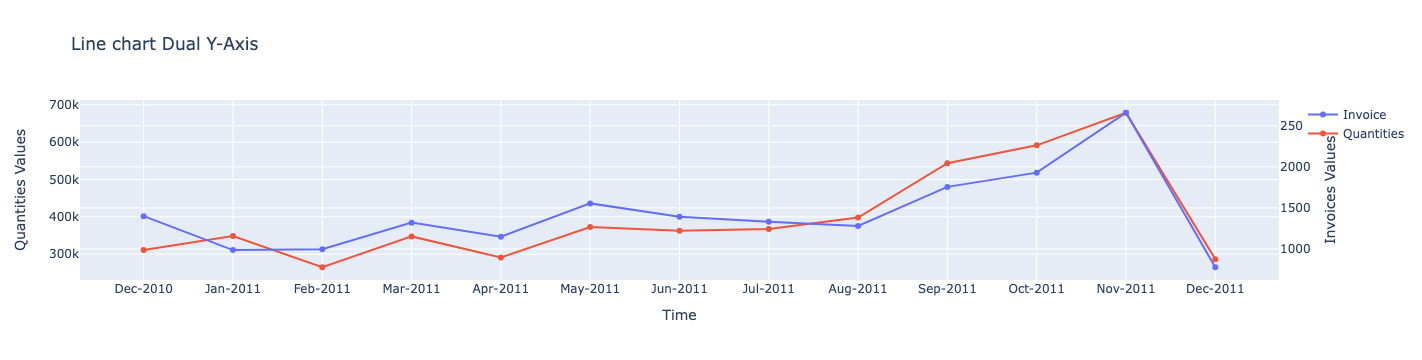

In [44]:
import plotly.graph_objects as go

line_trace_inv = go.Scatter(x=quantity_month, y=invoice_line, name='Invoice', yaxis='y2')

# Creating the line trace
line_trace_quan = go.Scatter(x=quantity_month, y=quantity_line, name='Quantities')

# Creating the bar trace

# Creating the combined chart
fig = go.Figure(data=[line_trace_inv, line_trace_quan])

# Updating layout and axis labels
fig.update_layout(title='Line chart Dual Y-Axis',
                  xaxis_title='Time',
                  yaxis=dict(title='Quantities Values'),
                  yaxis2=dict(title='Invoices Values', overlaying='y', side='right'))

fig.show()

Based on the dual chart, we can observe an increasing trend in customer purchasing behavior over time, indicating strong sales performance for the company. 

It is important to note that the decreasing value in December 2011 is attributed to the analysis considering data only until the middle of the month.

In [75]:
def most_frequent(df):
    frequent_item = df['Description'].value_counts().idxmax()
    frequency = df['Description'].value_counts().max()
    return frequent_item, frequency

most_fr = []

most_fr.append(most_frequent(data[data['Year'] == 2010]))
for i in range(1, 13):
    most_fr.append(most_frequent(data[(data['Year'] == 2011) & (data['Month'] == i)]))

most_fr

[('WHITE HANGING HEART T-LIGHT HOLDER', 207),
 ('WHITE HANGING HEART T-LIGHT HOLDER', 157),
 ('SET OF 3 CAKE TINS PANTRY DESIGN ', 127),
 ('WHITE HANGING HEART T-LIGHT HOLDER', 171),
 ('PARTY BUNTING', 163),
 ('SPOTTY BUNTING', 209),
 ('PARTY BUNTING', 179),
 ('PARTY BUNTING', 158),
 ('JUMBO BAG RED RETROSPOT', 157),
 ('HOT WATER BOTTLE KEEP CALM', 192),
 ("PAPER CHAIN KIT 50'S CHRISTMAS ", 204),
 ('RABBIT NIGHT LIGHT', 452),
 ('RABBIT NIGHT LIGHT', 116)]

### Market Basket Analyst

- Support: This measure indicates the frequency or prevalence of a particular itemset in the dataset. It represents the percentage of transactions that contain the itemset. High support values indicate popular or frequently occurring itemsets.

- Confidence: This measure quantifies the strength of association between two items A and B. It calculates the percentage of transactions containing item A that also contain item B. Higher confidence values suggest a stronger relationship between the items.

- Lift: Lift measures the dependency or correlation between two items A and B. It compares the observed frequency of co-occurrence of items A and B to the expected frequency if they were statistically independent. Lift values greater than 1 indicate a positive relationship between the items.

- Conviction: Conviction measures the degree of dependence between items A and B based on the notion of confidence. It quantifies the ratio of the expected confidence if A and B were independent to the observed confidence. Conviction values greater than 1 indicate a positive association.

Support {freq (x,y) / n, range: [0, 1]} gives the fraction of transactions which contains item x and y. It tells us about the frequently bought items or the combination of items bought frequently and we can filter out the items that have a low frequency.

Confidence {freq(x,y) / freq (x), range: [0, 1]} tells us how often the items x and y occur together, given the number times x occurs.

Lift {support/support(x) * support(y), range: [0, inf]} indicates the strength of a rule over the random occurrence of x and y. It explains the strength of a rule and more the Lift more is the strength.

In this Market Basket, we will focus mainly on the United Kingdom, where they have most information so we can easily analyze


In [76]:
#Unstack the Desctiption become the columns to see the relationship between the Invoice and Products
basket_plus = (data[data['Country']== 'United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [77]:
basket_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#Change the value in the basketplus become the binary values
def encode_units(x):
    if x <= 0:
        return 0 
    else:
        return 1

In [80]:
#Apply the encoding to determine which products are associated with each Invoice No.
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Find which Invoice No that have products more than or equals 2
basket_filter_plus = basket_encode_plus[(basket_encode_plus>0).sum(axis=1)>=2]
basket_filter_plus

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


According to the result above, we could see that there are 15376 transaction that bought more than 1 items.

It means, 92.35 % of the basket data is a transaction that is bought more than 1 item.

Now, applying the Apriori Algorithm for the datset

In [83]:
#From the dataset, we try to identify the dataset that has the min support = 0.03, with differents length (# of products) in the itemset
frequent_itemsets_plus = apriori(basket_filter_plus,min_support = 0.03, use_colnames = True).sort_values('support',ascending=False).reset_index(drop = True)
frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))
frequent_itemsets_plus

,support,itemsets,length
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.093197,(JUMBO BAG RED RETROSPOT),1
2,0.090466,(REGENCY CAKESTAND 3 TIER),1
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.082986,(PARTY BUNTING),1
...,...,...,...
103,0.030697,(DOORMAT UNION FLAG),1
104,0.030632,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",2
105,0.030502,(SET OF 3 HEART COOKIE CUTTERS),1
106,0.030372,(DOLLY GIRL LUNCH BOX),1


In [84]:
#From the dataset, we try to identify the dataset that has the min support = 0.02, with differents length (# of products) in the itemset
frequent_itemsets_plus = apriori(basket_filter_plus,min_support = 0.02, use_colnames = True).sort_values('support',ascending=False).reset_index(drop = True)
frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))
frequent_itemsets_plus

,support,itemsets,length
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.093197,(JUMBO BAG RED RETROSPOT),1
2,0.090466,(REGENCY CAKESTAND 3 TIER),1
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.082986,(PARTY BUNTING),1
...,...,...,...
272,0.020226,(CARD BILLBOARD FONT),1
273,0.020161,(VINTAGE DOILY TRAVEL SEWING KIT),1
274,0.020161,(ZINC FOLKART SLEIGH BELLS),1
275,0.020031,(PANTRY MAGNETIC SHOPPING LIST),1


In [85]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  >= 2) &
                        (frequent_itemsets_plus['support'] >= 0.03)]['itemsets'].iloc[0]

frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'})

In [86]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  >= 2) &
                        (frequent_itemsets_plus['support'] >= 0.03)]['itemsets'].iloc[1]

frozenset({'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'})

In [87]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  >= 2) &
                        (frequent_itemsets_plus['support'] >= 0.03)]['itemsets'].iloc[2]

frozenset({'GREEN REGENCY TEACUP AND SAUCER',
           'ROSES REGENCY TEACUP AND SAUCER '})

In [88]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  >= 2) &
                        (frequent_itemsets_plus['support'] >= 0.03)]['itemsets'].iloc[3]

frozenset({'LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT'})

In [89]:
fro = [frequent_itemsets_plus[ (frequent_itemsets_plus['length']  >= 2) &
                        (frequent_itemsets_plus['support'] >= 0.02)]['itemsets'].iloc[i] for i in range(4)]

In [90]:
for i in range(4):
    print(fro[i])

frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'})
frozenset({'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'})
frozenset({'ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'})
frozenset({'LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT'})


### Applying the 'Association Rule Mining'
- Rule generation is the first and foremost task in the mining of frequent patterns in such cases. An association rule is an implication expression of the form x → y, where x and y are disjoint itemsets. To evaluate the “interest” of such an association rule, different metrics have been developed. I will use the support, confidence and lift metrics.

In [67]:
association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)[0:20]['antecedents'][0]

frozenset({'PINK REGENCY TEACUP AND SAUCER'})

In [91]:
association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=2).sort_values('lift', ascending=False).reset_index(drop=True)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.031803,0.030957,0.022177,0.697342,22.525889,0.021193,3.201769,0.986996
1,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.030957,0.031803,0.022177,0.716387,22.525889,0.021193,3.413792,0.986135
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024909,0.039802,0.022177,0.890339,22.369051,0.021186,8.756089,0.979699
3,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.039802,0.024909,0.022177,0.557190,22.369051,0.021186,2.202051,0.994894
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.039802,0.031803,0.026275,0.660131,20.756994,0.025009,2.848734,0.991279
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031803,0.039802,0.026275,0.826176,20.756994,0.025009,5.523961,0.983088
6,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.032908,0.030372,0.020356,0.618577,20.366683,0.019357,2.542133,0.983258
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.030372,0.032908,0.020356,0.670236,20.366683,0.019357,2.932674,0.980686
8,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026275,0.043900,0.022177,0.844059,19.227048,0.021024,6.131184,0.973570
9,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.043900,0.026275,0.022177,0.505185,19.227048,0.021024,1.967858,0.991517


From the association_rules results above, we can see that the itemset *ROSES REGENCY TEACUP AND SAUCER and GREEN REGENCY TEACUP AND SAUCER* and *"PINK REGENCY TEACUP AND SAUCER"* has the highest association. This is indicated by the highest "lift" value of 22.525889.

The higher the lift value, the stronger the association between the items. If the lift value is greater than 1, we can consider the items to be associated with each other. In this case, the highest value is 22.525, which is very high. This implies that these two items are highly likely to be purchased together.

Remember that the confidence value is influenced by the antecedent and consequent. If the antecedent is higher than the consequent, then the rule that will be applied is rule number 1 (not number 2) and vice versa. 

In this case, the antecedent value is higher than the consequent value. It means we will apply rule number 1 which is *PINK REGENCY TEACUP AND SAUCER"* → 𝐺𝑅𝐸𝐸𝑁 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸𝑅  𝑅𝑂𝑆𝐸𝑆 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸. In a more detail explanation, it means that a customer will tends to bought *Pink Regency Teacup and Saucer* **BEFORE** they bought the itemset. 
        
The first row shows that the itemset *PINK REGENCY TEACUP AND SAUCER* is associated with the itemset 𝑅𝑂𝑆𝐸𝑆 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸, 𝐺𝑅𝐸𝐸𝑁 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸𝑅. 

The support value of this association is 0.022177, indicating that approximately 2.2% of the transactions contain this combination of items. The confidence is 0.697342, which means that when customers buy *PINK REGENCY TEACUP AND SAUCER*, there is a 69.7% chance that they will also buy 𝑅𝑂𝑆𝐸𝑆 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸, 𝐺𝑅𝐸𝐸𝑁 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 𝑆𝐴𝑈𝐶𝐸𝑅.
The lift value of 22.525889 suggests a strong association between these itemsets, indicating that customers are highly likely to purchase them together.    
    
Overall, these results indicate a strong association between the itemsets mentioned, suggesting that customers are more likely to purchase the *PINK REGENCY TEACUP AND SAUCER* when they buy the (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER), and vice versa. This information can be valuable for marketing and sales strategies, such as bundling or cross-promoting these items to increase sales.

In this articles, we’ve done a Market Basket Analysis using an actual online retail transaction data from UK. The result of this market basket analysis could be used for a data-driven marketing strategy and decision making. In this datasets, we could generates several business insights as follows :

Item Placements. We could put 3 kinds of REGENCY TEACUP AND SAUCER in a closer place, maybe in a same shelf or any other closer place.

Products Bundling. We could put ROSES REGENCY TEACUP AND SAUCER and GREEN REGENCY TEACUP AND SAUCER as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.

Customer Recommendation and Discounts. We could put Roses Regency Teacup and Saucer in the cashier, so that every time a customer bought Green Regency Teacup and Saucer, we could offer and recommend them to buy Roses Regency Teacup and Saucer with a lower price.